In [2]:
from tensorflow.keras import datasets, preprocessing, models, layers, optimizers, losses
import matplotlib.pyplot as plt

VOCAB_SIZE = 88584

(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words = VOCAB_SIZE)
train_data[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 10156,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 11596,
 349,
 2637,
 148,
 605,
 15358,
 8003,
 15,
 123,
 125,
 68,
 23141,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 36893,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 25249,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 46151,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 

In [3]:
# Pre-process rows to have the same length
print("Original length: {}".format(len(train_data[1])))

MAX_LEN = 250 
train_data = preprocessing.sequence.pad_sequences(train_data, MAX_LEN)
test_data = preprocessing.sequence.pad_sequences(test_data, MAX_LEN)

print("New length: {}".format(len(train_data[1])))
train_data[1]

Original length: 189
New length: 250


array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     1,   194,
        1153,   194,  8255,    78,   228,     5,     6,  1463,  4369,
        5012,   134,    26,     4,   715,     8,   118,  1634,    14,
         394,    20,    13,   119,   954,   189,   102,     5,   207,
         110,  3103,    21,    14,    69,   188,     8,    30,    23,
           7,     4,   249,   126,    93,     4,   114,     9,  2300,
        1523,     5,   647,     4,   116,     9,    35,  8163,     4,
         229,     9,   340,  1322,     4,   118,     9,     4,   130,
        4901,    19,

In [4]:
# Build model
model = models.Sequential([layers.Embedding(VOCAB_SIZE, 32),
                         layers.LSTM(32),
                         layers.Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          2834688   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 2,843,041
Trainable params: 2,843,041
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Train model
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.BinaryCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 38s 61ms/step - loss: 0.4436 - accuracy: 0.7947 - val_loss: 0.3527 - val_accuracy: 0.8460
Epoch 2/10
625/625 [==============================] - 38s 61ms/step - loss: 0.2463 - accuracy: 0.9057 - val_loss: 0.3698 - val_accuracy: 0.8592
Epoch 3/10
625/625 [==============================] - 38s 61ms/step - loss: 0.1897 - accuracy: 0.9309 - val_loss: 0.2999 - val_accuracy: 0.8870
Epoch 4/10
625/625 [==============================] - 38s 61ms/step - loss: 0.1566 - accuracy: 0.9445 - val_loss: 0.3460 - val_accuracy: 0.8630
Epoch 5/10
625/625 [==============================] - 38s 62ms/step - loss: 0.1336 - accuracy: 0.9534 - val_loss: 0.3146 - val_accuracy: 0.8796
Epoch 6/10
625/625 [==============================] - 39s 62ms/step - loss: 0.1160 - accuracy: 0.9597 - val_loss: 0.3170 - val_accuracy: 0.8870
Epoch 7/10
625/625 [==============================] - 39s 62ms/step - loss: 0.1029 - accuracy: 0.9669 - val_loss: 0.4112 - val_accuracy:

(0.0, 0.4620820973068476)

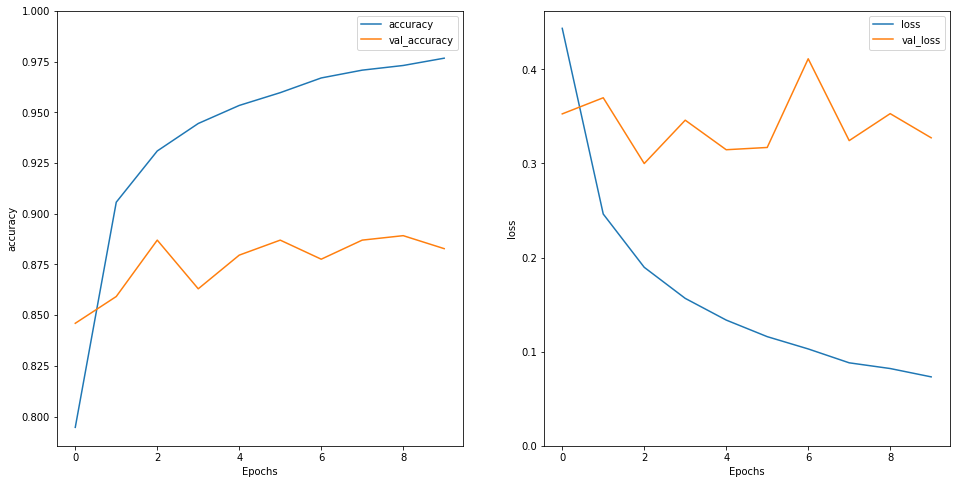

In [7]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+ metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+ metric])

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

In [23]:
# Encode text to integers of length 250
word_index = datasets.imdb.get_word_index()

def encode_text(text):
  tokens = preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return preprocessing.sequence.pad_sequences([tokens], MAX_LEN)[0]

text = "that movie was just amazing, so amazing"
encoded = encode_text(text)
print("Encoded text: {}".format(encoded))

# Decode integers to text
reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_integers(integers):
    PAD = 0
    text = ""
    for num in integers:
      if num != PAD:
        text += reverse_word_index[num] + " "

    return text[:-1]
  
print("Decoded text: {}".format(decode_integers(encoded)))

Encoded text: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 

In [58]:
import numpy as np
def predict(text):
    encoded_text = encode_text(text)
    pred = np.zeros((1, 250))
    pred[0] = encoded_text
    results = model.predict(pred)
    
    return results[0]

reviews = ["That movie was good! really loved it and would great watch it again because it was amazingly great",
"That movie really bad. I hated it and wouldn't watch it again. Was one of the worst things I've ever watched",
"The movie was not good. The animation and the graphics were terrible. I would not recommend this movie."]

for i, review in enumerate(reviews):
    print(predict(review), review)

[0.936746] That movie was good! really loved it and would great watch it again because it was amazingly great
[0.34671235] That movie really bad. I hated it and wouldn't watch it again. Was one of the worst things I've ever watched
[0.84933794] The movie was not good. The animation and the graphics were terrible. I would not recommend this movie.
